In [1]:
import numpy as np

In [2]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import make_blobs

In [15]:
X,y=make_blobs(centers=3,random_state=42)

In [16]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


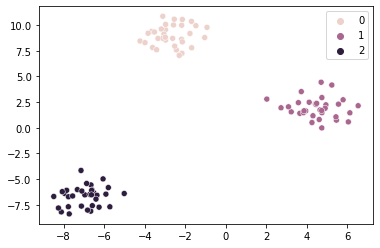

In [17]:
sns.scatterplot(X[:,0],X[:,1], hue=y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


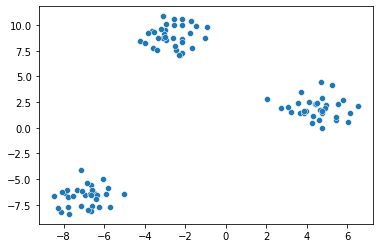

In [18]:
sns.scatterplot(X[:,0],X[:,1])

In [19]:
from sklearn.cluster import KMeans

In [28]:
model=KMeans(n_clusters=3)

In [21]:
model.fit(X)

KMeans(n_clusters=3)

In [23]:
y_gen=model.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


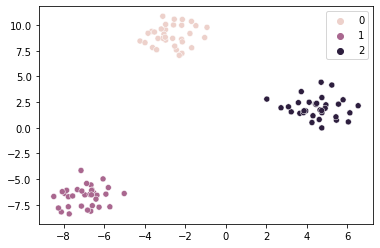

In [24]:
sns.scatterplot(X[:,0],X[:,1], hue=y_gen)

In [25]:
model.cluster_centers_

array([[-2.66780392,  8.93576069],
       [-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


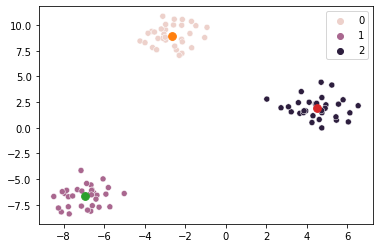

In [27]:
sns.scatterplot(X[:,0],X[:,1], hue=y_gen)
for center in model.cluster_centers_:
  plt.scatter(center[0],center[1],s=60)

In [29]:
class Cluster:

  def __init__(self,center):
    self.center=center
    self.points=[]

class CustomKMeans:

  def __init__(self,n_clusters=3):
      self.n_clusters=n_clusters

  def fit(self,X):
    clusters=[]
    for i in range(self.n_clusters):
      cluster=Cluster(center=random.choice(X))
      clusters.append(cluster)
    
    self.cluster_centers_=[cluster.center for cluster in clusters]
